In [ ]:
#Volume Patterns Analysis — this will help you understand how trading volume changes can
#signal market activity, institutional interest, or trend shifts.

#🔍 Objective:
#Analyze volume patterns in stocks.

#Identify unusually high volume days.

#Compare average volume for each stock.

#Visualize volume trends.



  Stock  Volume  average_volume  volume_spike  spike_ratio  spike_category
0   TCS    5998         5200.66         False     1.153315        no spike
1   TCS    1162         5200.66         False     0.223433        no spike
2   TCS    2974         5200.66         False     0.571850        no spike
3   TCS    4291         5200.66         False     0.825088        no spike
4   TCS    9461         5200.66          True     1.819192  moderate spike
5   TCS    1631         5200.66         False     0.313614        no spike
6   TCS    1905         5200.66         False     0.366300        no spike
7   TCS    3014         5200.66         False     0.579542        no spike
8   TCS    8896         5200.66          True     1.710552  moderate spike
9   TCS    1204         5200.66         False     0.231509        no spike


,Date,Stock,Open,Close,High,Low,Volume,average_volume,volume_spike,spike_ratio,spike_category
0,2023-01-01,TCS,1561.81,1606.90,1616.16,1535.86,5998,5200.66,False,1.153315,no spike
1,2023-01-02,TCS,2426.07,2468.59,2495.69,2402.11,1162,5200.66,False,0.223433,no spike
2,2023-01-03,TCS,2097.99,2101.49,2145.14,2096.71,2974,5200.66,False,0.571850,no spike
3,2023-01-04,TCS,1897.99,1968.15,2004.76,1880.93,4291,5200.66,False,0.825088,no spike
4,2023-01-05,TCS,1234.03,1268.50,1308.83,1215.02,9461,5200.66,True,1.819192,moderate spike
...,...,...,...,...,...,...,...,...,...,...,...
495,2023-04-06,RELIANCE,1530.03,1509.24,1563.44,1476.39,6004,5235.46,False,1.146795,no spike
496,2023-04-07,RELIANCE,1875.48,1958.40,1989.37,1827.65,7652,5235.46,False,1.461572,no spike
497,2023-04-08,RELIANCE,1116.60,1104.96,1139.77,1101.51,7416,5235.46,False,1.416494,no spike
498,2023-04-09,RELIANCE,2461.59,2576.09,2595.08,2458.74,4170,5235.46,False,0.796492,no spike


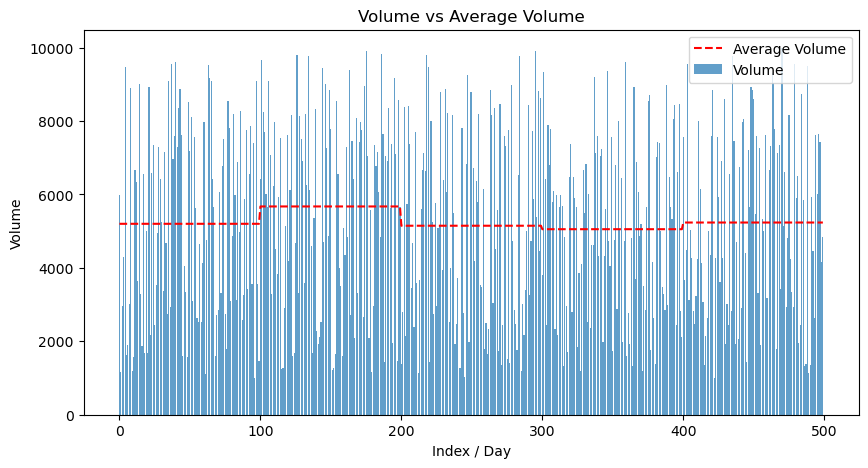

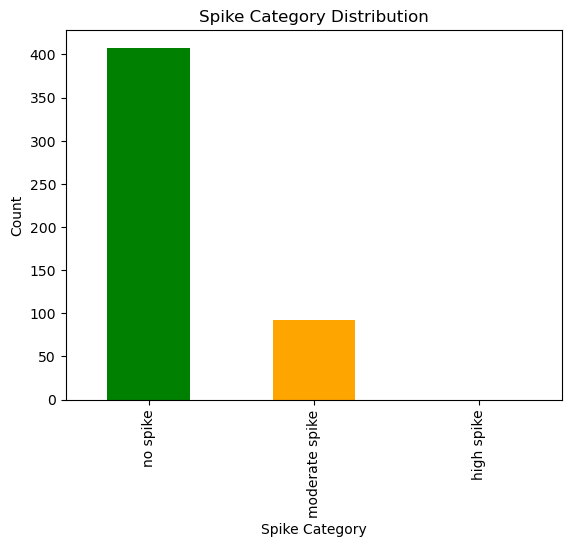

In [8]:
import pandas as pd 
from IPython.display import display
df=pd.read_csv(r"C:\Users\Rohini jadhav\Downloads\intense_stock_data.csv")

#calculate average Volume per stock 
average_volume=df.groupby("Stock")["Volume"].mean()

#creating a average volume column using volume near volume column to compare it later,understanding map 
# hard working me lol 
df["average_volume"]=df["Stock"].map(average_volume)

#finding volume spike
df["volume_spike"]=df["Volume"] > 1.5*df["average_volume"]
#calculate spike
df["spike_ratio"]=df["Volume"] / df["average_volume"]
# distributiing it  in different categories 
df["spike_category"]= pd.cut(df["spike_ratio"],
                              bins=[0,1.5,2.5,float("inf")],
                              labels=["no spike", "moderate spike", "high spike"])
# result (wheww!)
print(df[["Stock", "Volume", "average_volume", "volume_spike", "spike_ratio", "spike_category"]].head(10))
display(df)

import matplotlib.pyplot as plt

# Bar chart: Volume vs Average Volume
plt.figure(figsize=(10,5))
plt.bar(df.index, df["Volume"], label="Volume", alpha=0.7)
plt.plot(df.index, df["average_volume"], color="red", linestyle="--", label="Average Volume")

plt.xlabel("Index / Day")
plt.ylabel("Volume")
plt.title("Volume vs Average Volume")
plt.legend()
plt.show()

#spike categorey distribution
df["spike_category"].value_counts().plot(kind="bar", color=["green", "orange", "red"])
plt.title("Spike Category Distribution")
plt.xlabel("Spike Category")
plt.ylabel("Count")
plt.show()